<a href="https://colab.research.google.com/github/amitbasak/Machine-Learning-Project/blob/main/cat_vs_not_cat_(project_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd

In [29]:
import os
for dirname, _, filenames in os.walk('E:/Dataset/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:

import h5py
from PIL import Image
import os
import matplotlib.pyplot as plt


In [34]:
train_data_path = '/content/train_catvsnoncat.h5'
test_data_path = "/content/test_catvsnoncat.h5"

with h5py.File(train_data_path, 'r') as train_dataset:
    x_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])

with h5py.File(test_data_path, 'r') as test_dataset:
    x_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

print("origin X_train shape:",x_train.shape)
print("origin Y_train shape:", y_train.shape)
print("origin X_test shape:", x_test.shape)
print("origin Y_test shape:", y_test.shape)

origin X_train shape: (209, 64, 64, 3)
origin Y_train shape: (209,)
origin X_test shape: (50, 64, 64, 3)
origin Y_test shape: (50,)


In [35]:

train_x_flatten = x_train.reshape(x_train.shape[0], -1).T
test_x_flatten = x_test.reshape(x_test.shape[0], -1).T


X_train = train_x_flatten/255
X_test = test_x_flatten/255

print ("train_x's shape: " + str(X_train.shape))
print ("test_x's shape: " + str(X_test.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [77]:

n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(1)


    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def linear_activation_forward(A_prev, W, b, activation):


  if activation == "sigmoid":


      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = sigmoid(Z)

  elif activation == "relu":


      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = relu(Z)

  assert (A.shape == (W.shape[0], A_prev.shape[1]))
  cache = (linear_cache, activation_cache)

  return A, cache

def linear_forward(A, W, b):


  Z = np.dot(W, A) + b

  assert(Z.shape == (W.shape[0], A.shape[1]))
  cache = (A, W, b)

  return Z, cache

def compute_cost(AL, Y):


    m = Y.shape[0]

    cost = (-1. / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1 - Y), np.log(1 - AL)))

    cost = np.squeeze(cost)
    assert (cost.shape == ())

    return cost

def linear_activation_backward(dA, cache, activation):

  linear_cache, activation_cache = cache

  if activation == "relu":

      dZ = relu_backward(dA, activation_cache)
      dA_prev, dW, db = linear_backward(dZ, linear_cache)


  elif activation == "sigmoid":

      dZ = sigmoid_backward(dA, activation_cache)
      dA_prev, dW, db = linear_backward(dZ, linear_cache)

  return dA_prev, dW, db

def linear_backward(dZ, cache):

  A_prev, W, b = cache
  m = A_prev.shape[1]


  dW = (1. / m) * np.dot(dZ, cache[0].T)
  db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(cache[1].T, dZ)


  assert (dA_prev.shape == A_prev.shape)
  assert (dW.shape == W.shape)
  assert (db.shape == b.shape)

  return dA_prev, dW, db

def update_parameters(parameters, grads, learning_rate):

    parameters['W1'] = parameters['W1'] - learning_rate * grads['dW1']
    parameters['b1'] = parameters['b1'] - learning_rate * grads['db1']
    parameters['W2'] = parameters['W2'] - learning_rate * grads['dW2']
    parameters['b2'] = parameters['b2'] - learning_rate * grads['db2']

    return parameters


def sigmoid(Z):

  A = 1/(1+np.exp(-Z))
  cache = Z

  return A, cache

def relu(Z):

  A = np.maximum(0,Z)

  assert(A.shape == Z.shape)

  cache = Z
  return A, cache


def relu_backward(dA, cache):

  Z = cache
  dZ = np.array(dA, copy=True)


  dZ[Z <= 0] = 0

  assert (dZ.shape == Z.shape)

  return dZ

def sigmoid_backward(dA, cache):

  Z = cache

  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)

  assert (dZ.shape == Z.shape)

  return dZ

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6711376921892952
Cost after iteration 200: 0.6597716537024666
Cost after iteration 300: 0.6537081987305166
Cost after iteration 400: 0.650335156554738
Cost after iteration 500: 0.6483356044488142
Cost after iteration 600: 0.6470440139368259
Cost after iteration 700: 0.6461148725349101
Cost after iteration 800: 0.6453766616161668
Cost after iteration 900: 0.6447410526879567
Cost after iteration 1000: 0.6441632603338605
Cost after iteration 1100: 0.6436202870658476
Cost after iteration 1200: 0.6431002899818891
Cost after iteration 1300: 0.6425968227667962
Cost after iteration 1400: 0.6421074838854505
Cost after iteration 1500: 0.6416300169166765
Cost after iteration 1600: 0.6411632936782073
Cost after iteration 1700: 0.6407060511645564
Cost after iteration 1800: 0.6402568935794432
Cost after iteration 1900: 0.6398166338811626
Cost after iteration 2000: 0.6393864362532807
Cost after iteration 2100: 0.6389653078921917
Co

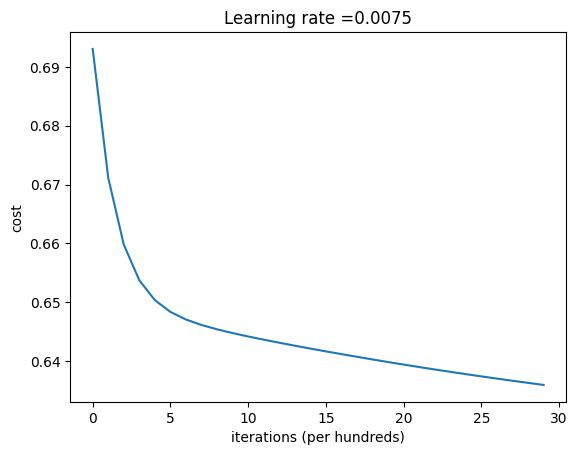

In [79]:
parameters = two_layer_model(X_train, y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)

In [80]:
def predict(X, y, parameters):


    m = X.shape[1]
    n = len(parameters)
    p = np.zeros((1,m))


    probas, caches = linear_activation_forward(X, parameters['W1'], parameters['b1'], activation = "relu")
    probas, caches = linear_activation_forward(probas, parameters['W2'], parameters['b2'], activation = "sigmoid")



    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0


    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

In [81]:
predictions_train = predict(X_train, y_train, parameters)

Accuracy: 0.6889952153110047


In [82]:
predictions_train = predict(X_test, y_test, parameters)

Accuracy: 0.7000000000000001


**Tensorflow**

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [105]:
model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [106]:
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5882 - loss: 1.1129 - val_accuracy: 0.5200 - val_loss: 0.6953
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6659 - loss: 0.6435 - val_accuracy: 0.5600 - val_loss: 0.7189
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6493 - loss: 0.7597 - val_accuracy: 0.6000 - val_loss: 0.7061
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7624 - loss: 0.5033 - val_accuracy: 0.3400 - val_loss: 1.2058
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7083 - loss: 0.5633 - val_accuracy: 0.7600 - val_loss: 0.5319
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8075 - loss: 0.4235 - val_accuracy: 0.7600 - val_loss: 0.5991
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8367 - loss: 0.3856 - val_accuracy: 0.4200 - val_loss: 1.0660
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7955 - loss: 0.4079 - val_accuracy: 0.7800 - v

In [107]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7671 - loss: 1.1176 
Accuracy: 76.00
